### 2.3.7 Kernelized Support Vector Machines (커널 서포트 벡터 머신)
* 입력 데이터로 부터 단순한 초평면(Hyperplane)으로 정의되지 않는 복잡한 모델을 구성할 수 있도록 확장된 모델 #### Linear Models and Non-linear Features

Text(0,0.5,'Feature 1')

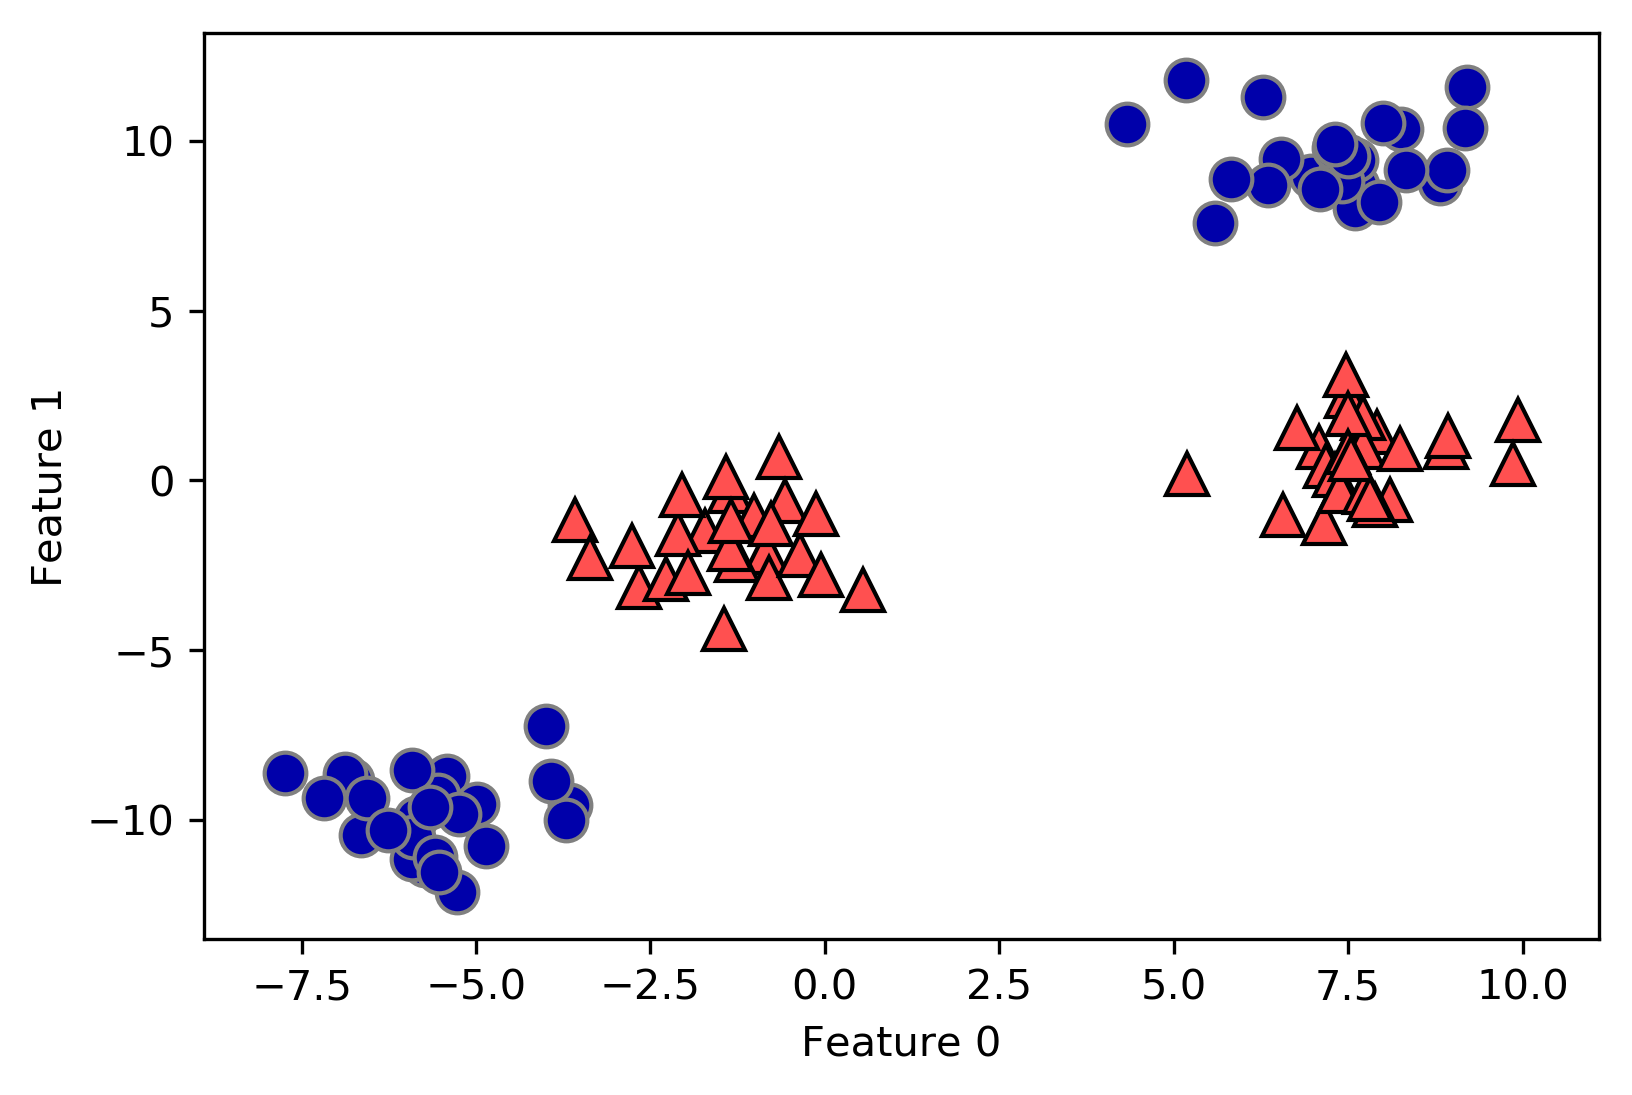

In [3]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

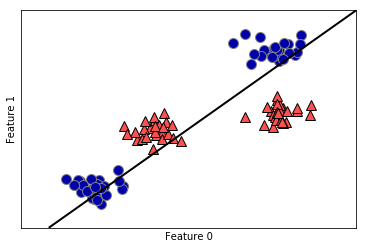

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [5]:
# add the squared first feature
# 모든 행(:)에 대해 1번째 열(1:)의 제곱 값을 덧붙임
X_new = np.hstack([X, X[:, 1:] ** 2])
print("X - Data shape: {}".format(X.shape))
print(X[0])
print(X[1])
print(X[2])
print()

print("X_new - Data shape: {}".format(X_new.shape))
print(X_new[0])
print(X_new[1])
print(X_new[2])

X - Data shape: (100, 2)
[-1.722 -1.48 ]
[-3.657 -9.548]
[7.078 0.995]

X_new - Data shape: (100, 3)
[-1.722 -1.48   2.191]
[-3.657 -9.548 91.169]
[7.078 0.995 0.99 ]


False
True
False


Text(0.5,0,'feature1 ** 2')

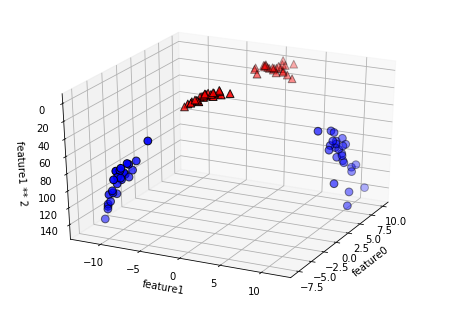

In [6]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D

ax = Axes3D(figure, elev=-152, azim=-26)

# plot first all the points with y==0, then all with y == 1
mask = y == 0
print(mask[0])
print(mask[1])
print(mask[2])

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

print("coef shape:", coef.shape)
print(coef)
print("intercept shape:", intercept.shape)
print(intercept)

coef shape: (3,)
[ 0.115 -0.193 -0.055]
intercept shape: (1,)
[1.154]


In [8]:
# show linear decision boundary
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
print("xx shape:", xx.shape)
print("yy shape:", xx.shape)
print(xx[0], xx[1], "...", xx[-1])
print(yy[0], yy[1], "...", yy[-1])

print()

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
print("XX shape:", XX.shape)
print("YY shape:", YY.shape)
print("ZZ shape:", ZZ.shape)
print(XX[0])
print(XX[1])

print(YY[0])
print(YY[1])

print(ZZ[0])
print(ZZ[1])

xx shape: (50,)
yy shape: (50,)
-9.740646580804565 -9.29840934401878 ... 11.928978021698963
-14.118806977213685 -13.549430354010138 ... 13.78064755976018

XX shape: (50, 50)
YY shape: (50, 50)
ZZ shape: (50, 50)
[-9.741 -9.298 -8.856 -8.414 -7.972 -7.529 -7.087 -6.645 -6.203 -5.761
 -5.318 -4.876 -4.434 -3.992 -3.549 -3.107 -2.665 -2.223 -1.78  -1.338
 -0.896 -0.454 -0.011  0.431  0.873  1.315  1.758  2.2    2.642  3.084
  3.526  3.969  4.411  4.853  5.295  5.738  6.18   6.622  7.064  7.507
  7.949  8.391  8.833  9.276  9.718 10.16  10.602 11.045 11.487 11.929]
[-9.741 -9.298 -8.856 -8.414 -7.972 -7.529 -7.087 -6.645 -6.203 -5.761
 -5.318 -4.876 -4.434 -3.992 -3.549 -3.107 -2.665 -2.223 -1.78  -1.338
 -0.896 -0.454 -0.011  0.431  0.873  1.315  1.758  2.2    2.642  3.084
  3.526  3.969  4.411  4.853  5.295  5.738  6.18   6.622  7.064  7.507
  7.949  8.391  8.833  9.276  9.718 10.16  10.602 11.045 11.487 11.929]
[-14.119 -14.119 -14.119 -14.119 -14.119 -14.119 -14.119 -14.119 -14.119
 -1

Text(0.5,0,'feature1 ** 2')

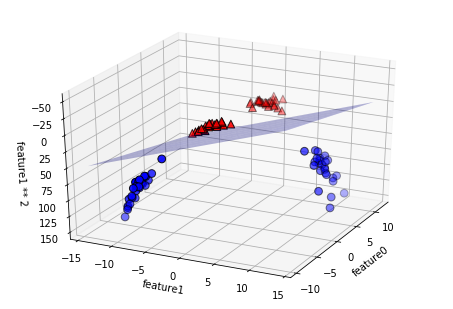

In [9]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [10]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.c_.html
type(np.c_)

numpy.lib.index_tricks.CClass

In [11]:
print(XX.ravel()[0], XX.ravel()[1], "...", XX.ravel()[-1])
print(YY.ravel()[0], YY.ravel()[1], "...", YY.ravel()[-1])
print(ZZ.ravel()[0], ZZ.ravel()[1], "...", ZZ.ravel()[-1])

print()

c = np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]
print(c.shape)
print(c[0])
print(c[1])
print(c[-1])

-9.740646580804565 -9.29840934401878 ... 11.928978021698963
-14.118806977213685 -14.118806977213685 ... 13.78064755976018
49.8382709241847 50.761631198153744 ... -2.37229314929101

(2500, 3)
[ -9.741 -14.119  49.838]
[ -9.298 -14.119  50.762]
[11.929 13.781 -2.372]


Text(0,0.5,'Feature 1')

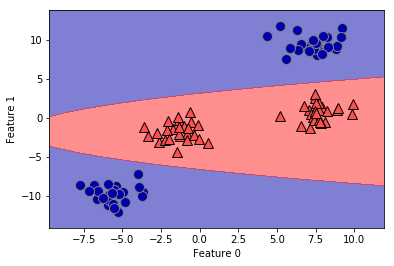

In [12]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])

plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The Kernel Trick
* 원본 데이터 특성에 비선형 특성을 추가하여 선형모델을 강력하게 만드는 방법의 단점
  * 어떤 특성을 선택하여 비선형 특성을 만들지 선택해야 하는 문제 발생
  * 많은 비선형 특성 추가에 따른 연산 비용 증가
* Kernel Trick (커널 기법)
  * 실제로 데이터 특성을 확장하지 않고, 데이터 사이의 거리(폭)을 계산할 때 확장된 특성에 대한 데이터 포인트들의 거리를 계산
  * 커널의 종류
    * 다항식 커널
      * 모든 원본 데이터 특성들에 대하여 가능한 조합을 지정된 차수까지 모두 계산
        * 예: $특성1^2 \times 특성2^5$
      * RBF (Radial Basis Function) or Gaussian (가우시안)
      * 모든 원본 데이터 특성을 무한한 특성 공간에 매핑
      * 즉, 모든 차수의 모든 다항식을 고려
        * 일반적으로 고차항이 될 수록 특성의 중요도는 떨어지게됨

#### Understanding SVMs
* Support Vectors
  * 주어진 훈련 데이터들 중 두 클래스 사이의 경계에 위치한 데이터 포인트들 --> 결정 경계를 만드는데 영향을 주는 포인트들
  * RBF 커널 (가우시안 커널) 에서의 데이터 포인트 $x_1$과 $x_2$ 사이 거리
    * $k_{rbf}(x_1, x_2 )=exp(-\gamma||x_1 - x_2 ||^2 )$
    * $\gamma$ : 가우시안 커널의 폭을 제어하는 매개변수

In [13]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (26, 2)
y.shape: (26,)


[[ 8.106  4.287]
 [ 9.502  1.938]
 [11.564  1.339]
 [10.24   2.455]
 [ 7.998  4.853]]
[[-10.     -6.252  -3.734  10.      9.986]]


Text(0,0.5,'Feature 1')

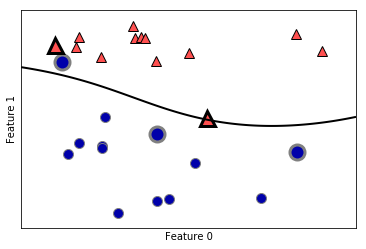

In [14]:
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_
dual_coef = svm.dual_coef_
print(sv)
print(dual_coef)

# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = dual_coef.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters (SVM 파라미터 튜닝)
* SVC(kernel='rbf', C=10, gamma=0.1) 에서 각 매개변수 튜닝
  * gamma
    * 가우시안 커널 폭과 반비례
    * 훈련 샘플 데이터가 미치는 영향의 범위 결정
    * gamma값이 커짐 --> 가우시안 커널의 반경이 작아짐 --> 모델의 복잡도가 높아짐
    * gamma값이 작아짐 --> 가우시안 커널의 반경이 커짐 --> 모델의 복잡도가 낮아짐
  * C (Regulation, 규제 변수)
    * C가 커짐 --> 모델 제약이 작아짐 --> 샘플 데이터가 모델에 많은 영향을 줌 --> 모델의 복잡도가 높아짐
    * C가 작아짐 --> 모델 제약이 커짐 --> 샘플 데이터가 모델에 적은 영향을 줌 --> 모델의 복잡도가 낮아짐
  * 즉...
    * 모델 복잡도 증가 --> gamma값 증가 --> C값 증가
    * 모델 복잡도 감소 --> gamma값 감소 --> C값 감소

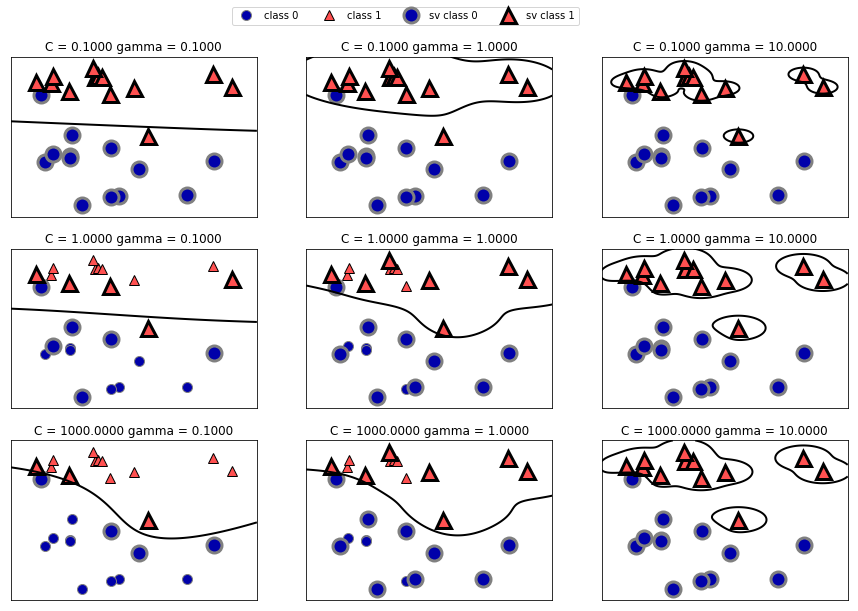

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

* 유방암 데이터에 SVC 적용
  * SVC의 매개변수 기본 값
    * C=1.0
    * gamma=1/n_features

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


* 훈련 데이터에 대한 Scaling이 되어 있지 않음 --> 모델 성능 저하

Text(0,0.5,'Feature magnitude')

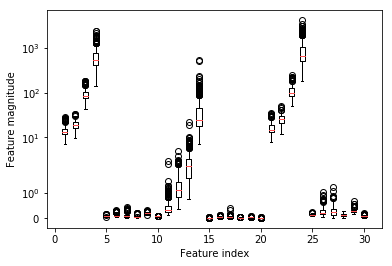

In [19]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

#### Preprocessing data for SVMs
* SVM에서는 특히 각 특성값의 범위가 비슷해지도록 정규화하는 것 매우 중요
* 정규화 식
## <center>$\frac{X-min(X)}{max(X)-min(X)}$</center>

In [20]:
print(X_train.shape)
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
print(min_on_training.shape)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

(426, 30)
(30,)
Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


* [NOTE] 테스트 데이터 세트에 대해서도 동일한 정규화를 하지만, 훈련 데이터 세트에서 계산된 최소값과 최대값과 해당 범위를 사용

In [21]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [22]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [23]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


#### Strengths, weaknesses and parameters
* SVM 장점
  * 다양한 데이터셋에 대해서도 잘 작동하는 강력한 모델
  * 데이터의 특성이 몇 개 되지 않더라도 복잡한 결정 경계 생성 가능
* SVM 단점
  * 샘플 데이터 개수가 너무 많을 때 성능이 오히려 떨어질 수 있음
  * 데이터 전처리와 매개변수 설정에 신경을 많이 써야 함